# Toronto, Ontario 3 Bedroom Townhouse Energy Data

---

Created by Sujeethan Vigneswaran

Date Collected: Feb 12, 2021

In [1]:
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install scikit-learn

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [50]:
df = pd.read_csv("../data/data.csv", skiprows=1, index_col=0, parse_dates=True)

df["Year"] = df.index.year
df["Month"] = df.index.month

In [51]:
print(df.dtypes)

HighTemp (Celcius)      int64
LowTemp (Celcius)       int64
Off-Peak (kWh)        float64
Mid-Peak (kWh)        float64
On-Peak (kWh)         float64
Total (kWh)           float64
Year                    int64
Month                   int64
dtype: object


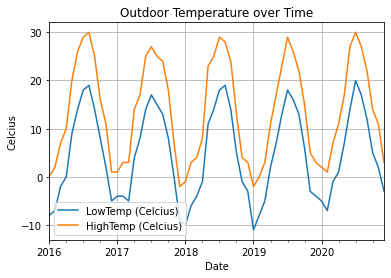

In [57]:
df["LowTemp (Celcius)"].plot()
df["HighTemp (Celcius)"].plot()
plt.ylabel("Celcius")
plt.title('Outdoor Temperature over Time')
plt.legend()
plt.grid(True)

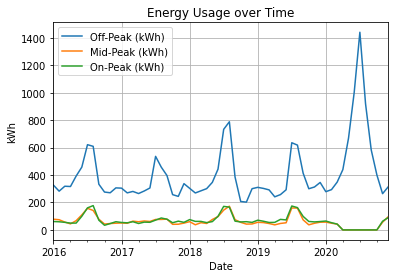

In [56]:
df["Off-Peak (kWh)"].plot()
df["Mid-Peak (kWh)"].plot()
df["On-Peak (kWh)"].plot()
plt.ylabel("kWh")
plt.title("Energy Usage over Time")
plt.legend()
plt.grid(True)

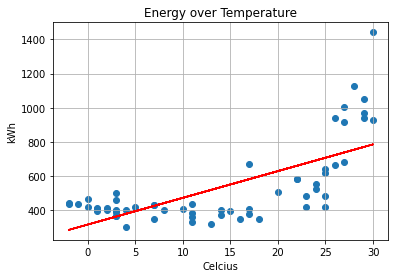

In [73]:
linear_regressor = LinearRegression()
linear_regressor.fit(df["HighTemp (Celcius)"].values.reshape(-1,1),df["Total (kWh)"].values.reshape(-1,1))
y_pred = linear_regressor.predict(df["HighTemp (Celcius)"].values.reshape(-1,1))

plt.scatter(df["HighTemp (Celcius)"],df["Total (kWh)"])
plt.plot(df["HighTemp (Celcius)"], y_pred, "red")
plt.ylabel("kWh")
plt.xlabel("Celcius")
plt.title("Energy over Temperature")
plt.grid(True)